# Scikit-stats project for Machine learning

![logo](https://i2.wp.com/softwareengineeringdaily.com/wp-content/uploads/2016/09/scikit-learn-logo.png?w=566&ssl=1)

*Rastislav Petras g00252861@gmit.ie*


[link to scikit-learn Tutorials](https://scikit-learn.org/stable/tutorial/index.html)

# Mathematical sample of testing Hypothesis One-Way Anova

Using sets of screenshots from Youtuber for better understanding of mathematical order and flow to achieve testing of this Hypothesis

[Youtube link](https://www.youtube.com/watch?v=dUw-Jg4py1c)

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova1.JPG?raw=true)

**Step 1.**
Define null and alternative Hypothesis

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova2.JPG?raw=true)

**Step 2.**
Calculate sum of squares between the groups.

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova3.JPG?raw=true)

**Step 3.**
Caculate sum of squares within the groups

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova4.JPG?raw=true)

**Step 4.**
Calculate sum of squares for Total variance.

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova5.JPG?raw=true)

**Step 5.**
Prepare the Anova table.

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova6.JPG?raw=true)

F-ratio = 1.5 while F-limit 5% from distribution table = F(2,9)=4.26

**Step 5.1.**
Crosscheck numerator (2) with Denominator (9)

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova7.JPG?raw=true)

**Step 6.**
Prepare the Anova table.

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/anova8.JPG?raw=true)

F-ratio (1.5) is less than Critical value (4.26), therefore we can conclude that **null Hypothesis is True and cannot be rejected**. It also implies that variety of wheat(seeds) doesnt affect the production of wheat significantly.

## Lets start with ANOVA 

Prior writing this paragraph I have watch numerous contents relating to Analysis of Variance. Well explained videos mathematically calculated results whether Null Hypothesis could not be or has to be rejected perhaps Alternative Hypothesis is true. Among wide community of Scientist and Physics there was one that I could easily track how he proceeds with any mathematical or algorithm  problem. Brandon Foltz with pseudo name / YouTube name “Statistic 101” senior learning designer has variety of learning content that is very well explained.

As a Continuous Improvement Specialist in my new job, I am also undertaking  development course of Lean Six Sigma. Company “Prysmian Group” I work for within my region manufactures data and optical cables. Part of this training is to deliver savings in reduction of insulated scrap via DMAIC (data-driven strategy used to improve processes). Prior defining a problem statement and set a goal I have started drill down in order to collect most accurate data.

Our plant in Presov, Slovakia during manufacturing process creates in average 30 tonnes of  insulated scrap on monthly basis. There are two manufacturing processes that such a scrap can be made. Core line and Group Twinners. Basically core line process extrudes cooper cable with issolation which 8 of those are then grouped in pairs of 2 and those four pairs twisted again.  

As a part of drill down i have defined 3 types of scrap within Core lines and 2 more within Group Twinner. Currently I am in my day 4 of this data collection to quantify amount scrap produced at different type of proceses. I am not exactly sure what would be outcome of this data colection in terms of what type of scrap do we target and define a Problem statement but after a learning Anova last few days I have clear goal to use one type of colected data and analize variance within them. Rejecting null hypothesis would be a baseline for improvment.  

As already mentioned one of the type of scrap i am observing is a variance in lenght of cable required to make a change from one colour to another. During 12 hour shift operator manufactures between 5 to 6 sets of cable with 4 white coils of cable that is then paired with 1 coil of blue, brown, green and orange coil. Typically operator starts manufacturing 24 coils of white and than move on 6 orange, 6 blue...  Thats what Ethernet cable looks like.   

As we have 8 production lines(Groups of 8 factors) and colour change(columns of 5 factors) is made not always but mainly 5 times during this shift with multiple data colected across multiple shifts(Replicaton-data taken accross 2 shifts and several days).

**Sound's familiar?**

Yes, It does to me too now. Therefore i am going to use data i have collected over  number of days to perform and display the results of ANOVA using scipy.stats.

## What Is a 2-Way ANOVA?

 ANOVA stands for analysis of variance and tests for differences in the effects of independent variables on a dependent variable. A two-way ANOVA test is a statistical test used to determine the effect of two nominal predictor variables on a continuous outcome variable.

A two-way ANOVA tests the effect of two independent variables on a dependent variable. A two-way ANOVA test analyzes the effect of the independent variables on the expected outcome along with their relationship to the outcome itself. Random factors would be considered to have no statistical influence on a data set, while systematic factors would be considered to have statistical significance. 

## Screenshot from my one-pager of LSS project

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/lss.JPG?raw=true)

Approach to this project was that i have started drill down asking for this level of details:

1. Production line (KP100,KP300...)
2. Diameter of cooper cable before insulation (0.42,0.55...)
3. Color change (White to Orange, Orange to Brown...)
4. Category change
5. startup
6. NCR for Breakdown
7. NCR for incorrect parameters

Drill down form pictured below

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/drill.JPG?raw=true)

Data structure resulting from drill down pictured below.

![Anova](https://github.com/rastislp/Machine_learning/blob/main/Images/data.JPG?raw=true)

Next step towards completing these project is analysing collected data. As you can see from sunburn chart from one pager above, colour change scrap is significant and data strucure are just like one i need for performing 2 way anova analysis. For purpose of this analysis i am going to filter out data from production lines KP302 and KP303 as those werent running and repeat 6 times.

As there are 6 and 5 levels for production lines and colour change types, respectively, this is a 6 x 5 factorial design yielding 30 unique combinations for measurement of the response variable.

In [13]:
import pandas as pd
import seaborn as sns

In [14]:

d = pd.read_csv("Images/CSVdata.csv")


In [17]:
print(d)

      Line  white_to_orange  orange_to_brown  brown_to_blue  blue_to_green  \
0   KP_100              1.8              1.7            2.9            2.2   
1   KP_100              1.7              1.6            2.5            2.1   
2   KP_100              1.8              2.5            2.2            2.6   
3   KP_100              1.7              1.7            2.9            2.1   
4   KP_100              1.7              1.7            2.1            1.9   
5   KP_100              1.7              3.5            5.1            4.4   
6   KP_101              2.5              2.5            3.2            2.5   
7   KP_101              2.4              2.4            2.7            2.2   
8   KP_101              2.5              1.6            2.2            2.0   
9   KP_101              2.5              3.0            3.5            3.0   
10  KP_101              2.6              2.8            2.7            2.7   
11  KP_101              2.4              2.3            2.8     

In [18]:
d_melt = pd.melt(d, id_vars=['Line'], value_vars=['white_to_orange', 'orange_to_brown', 'brown_to_blue', 'blue_to_green', 'green_to_white' ])



In [19]:
d_melt.columns = ['Line', 'Colour_change', 'km_value']

In [32]:
d_melt.head()

,Line,Colour_change,km_value
0,KP_100,white_to_orange,1.8
1,KP_100,white_to_orange,1.7
2,KP_100,white_to_orange,1.8
3,KP_100,white_to_orange,1.7
4,KP_100,white_to_orange,1.7


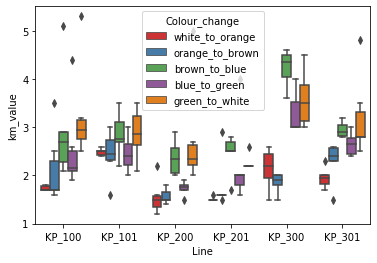

In [34]:
sns.boxplot(x="Line", y="km_value", hue="Colour_change", data=d_melt, palette="Set1")

Seaborn.pydata.org. 2021. seaborn.boxplot — seaborn 0.11.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.boxplot.html> [Accessed 22 December 2021].